In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing required packages
import re
import pandas as pd
import numpy as np
from PIL import Image

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from wordcloud import WordCloud

In [3]:
# reading the dataset and loading into a dataframe
df = pd.read_csv('../data/data.csv')

# printing the shape: (rows, columns)
display(df.shape)

# first 5 datapoints
display(df.head())

# 5 random samples
display(df.sample(5))

(5842, 2)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


,Sentence,Sentiment
1241,Sanoma Magazines Finland 's net sales grew to ...,positive
4730,"$NFLX small pos, short 180 wkly puts.",negative
4664,The interchange of Editors-in-Chief is a part ...,neutral
4219,Sponda Plc 's Annual General Meeting decided o...,neutral
2508,"In addition to software development , the new ...",neutral


neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


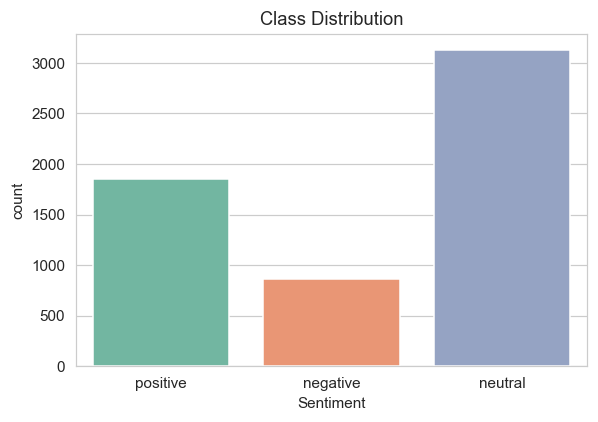

In [4]:
# distribution of datapoints by class labels
print(df['Sentiment'].value_counts())

# plotting the class distribution after droping duplicates
plt.figure(dpi=110)
chart = sns.countplot(x="Sentiment", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Sentiment')
plt.show()

In [5]:
# finding duplicate sentences
df[df['Sentence'].duplicated()]

,Sentence,Sentiment
266,Finnish GeoSentric 's net sales decreased to E...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
349,Full-year operating result for 2008 was 3.6 mi...,negative
387,"Making matters more difficult , the company sa...",negative
496,"Antti Orkola , president of Kemira GrowHow 's ...",negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [6]:
# extracting indices of duplicate sentences
duplicate_indices = df[df['Sentence'].duplicated()].index.to_list()

dup_df = None

# extracting each set of duplicate sentences
for index in duplicate_indices:
    dup_df = pd.concat([dup_df, df[df['Sentence'] == df['Sentence'].loc[index]]])

dup_df

,Sentence,Sentiment
66,Finnish GeoSentric 's net sales decreased to E...,negative
266,Finnish GeoSentric 's net sales decreased to E...,neutral
163,Sales in Finland decreased by 10.5 % in Januar...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
195,Full-year operating result for 2008 was 3.6 mi...,neutral
...,...,...
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
1860,RISING costs have forced packaging producer Hu...,neutral
5837,RISING costs have forced packaging producer Hu...,negative
186,"In the building and home improvement trade , s...",negative


In [7]:
# dropping the duplicate sentences with "neutral" sentiment
for index in duplicate_indices:
    temp = df[df['Sentence'] == df['Sentence'].loc[index]]
    dup_idx = temp[temp['Sentiment'] == 'neutral'].index[0]
    df = df.drop(index=dup_idx)

# resetting the index
df.reset_index()
    
# verifying if duplicate sentences are dropped
df[df['Sentence'].duplicated()]

,Sentence,Sentiment


neutral     2610
positive    1852
negative     860
Name: Sentiment, dtype: int64


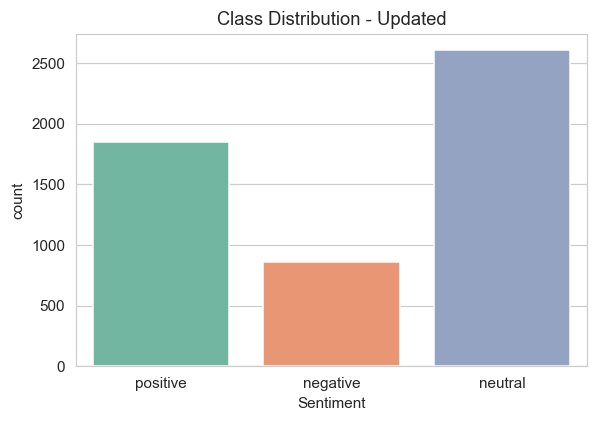

In [8]:
# updated distribution of datapoints by class labels
print(df['Sentiment'].value_counts())

# plotting the class distribution after droping duplicates
plt.figure(dpi=110)
chart = sns.countplot(x="Sentiment", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution - Updated')
axes.set_xlabel('Sentiment')
plt.show()

In [9]:
# counting null values in the dataset
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [10]:
# splitting into train-validation-test sets (60-20-20)
# performing a random split

# train-test split (80-20)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Sentiment'])

# train-validation split (80-20)
# 0.8 * 0.25 = 0.2
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=42, stratify=df_train['Sentiment'])

# rest index
df_train.reset_index()
df_valid.reset_index()
df_test.reset_index()

# size of train-validation-test sets
print('train:',df_train.shape[0])
print('valid:',df_valid.shape[0])
print('test:',df_test.shape[0])

# saving validation set
df_valid.to_csv('../data/valid_data.csv', index=False)

# saving test set
df_test.to_csv('../data/test_data.csv', index=False)

train: 3192
valid: 1065
test: 1065


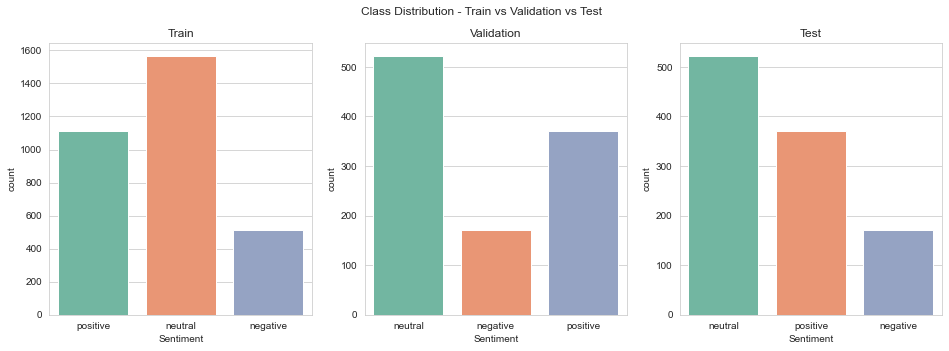

In [11]:
# plotting class distribution for train and test sets
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,5))
fig.suptitle('Class Distribution - Train vs Validation vs Test')

chart = sns.countplot(x="Sentiment", data=df_train, palette="Set2", ax=ax1)
axes = chart.axes
axes.set_title('Train')
axes.set_xlabel('Sentiment')

chart = sns.countplot(x="Sentiment", data=df_valid, palette="Set2", ax=ax2)
axes = chart.axes
axes.set_title('Validation')
axes.set_xlabel('Sentiment')

chart = sns.countplot(x="Sentiment", data=df_test, palette="Set2", ax=ax3)
axes = chart.axes
axes.set_title('Test')
axes.set_xlabel('Sentiment')
plt.show()

In [12]:
# spawning a word lemmatizer
lemma = WordNetLemmatizer()

# loading all the english stopwords
stop_words = stopwords.words('english')

# total stopwords
print(len(stop_words))

# first 10 stopwords
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [13]:
## defining the cleaning and preprocessing actions
# converting text to lowercase
# removing links
# coverting text into tokens
# removing stop words
# lemmatizing all words
# removing all words with length less than 3
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+',' ',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(w) for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [14]:
# cleaning and preprocessing the tweet_text column
df_train['clean_sentence'] = df['Sentence'].apply(clean_text)

display(df_train.loc[:,['Sentence', 'clean_sentence']].head())

,Sentence,clean_sentence
2823,UPM-Kymmene is one of the world 's leading pri...,upm kymmene one world leading printing paper p...
685,Nokia was up 0.12 pct to 16.70 eur after kicki...,nokia pct eur kicking morning negative territory
3050,Mr K.R. Vasantha has been appointed Managing D...,vasantha appointed managing director incap con...
827,Consolidated net sales increased 16 % to reach...,consolidated net sale increased reach eur oper...
3910,CS Cabot exports 55 % of its production mainly...,cabot export production mainly goodyear bridge...


In [15]:
# clean training dataset
df_train_cleaned = df_train.loc[:,['clean_sentence', 'Sentiment']]

# saving the cleaned training data
df_train_cleaned.to_csv('../data/train_data.csv', index=False)

display(df_train_cleaned.sample(10))

,clean_sentence,Sentiment
2657,program included operational improvement reduc...,neutral
436,finnish software developer basware oyj said no...,positive
1217,adp news oct finnish food company raisio oyj o...,positive
684,vaahto pulp paper finnish vaahto group awarded...,positive
3003,operating profit declined mainly due increased...,negative
3667,petersburg oct prime finnish tire producer nok...,positive
5590,britain ftse steady supported dixons carphone,positive
2348,turnaround buy bhp billiton plc home retail gr...,positive
4011,end review period nordic aluminium order book ...,positive
3139,combined value order almost eur,neutral


## WordCloud: Neutral sentences
----

In [16]:
# creating a mask for wordcloud
# mask = np.array(Image.open('../images/image.png'))
# plt.axis('off')
# plt.imshow(mask)
# plt.show()

colormap = 'Set2'

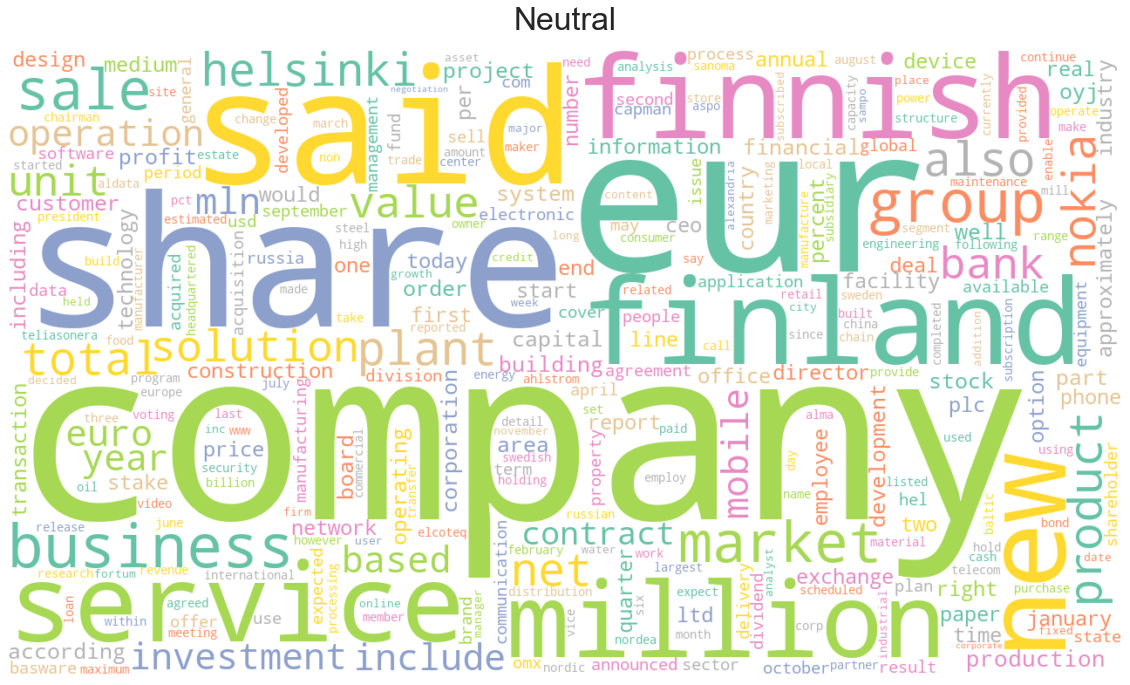

In [17]:
# wordcloud for neutral statements
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
#     mask=mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['Sentiment'] == 'neutral'].clean_sentence)))

plt.axis('off')
plt.title('Neutral', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig("../images/wordcloud-neutral.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Positive sentences
----

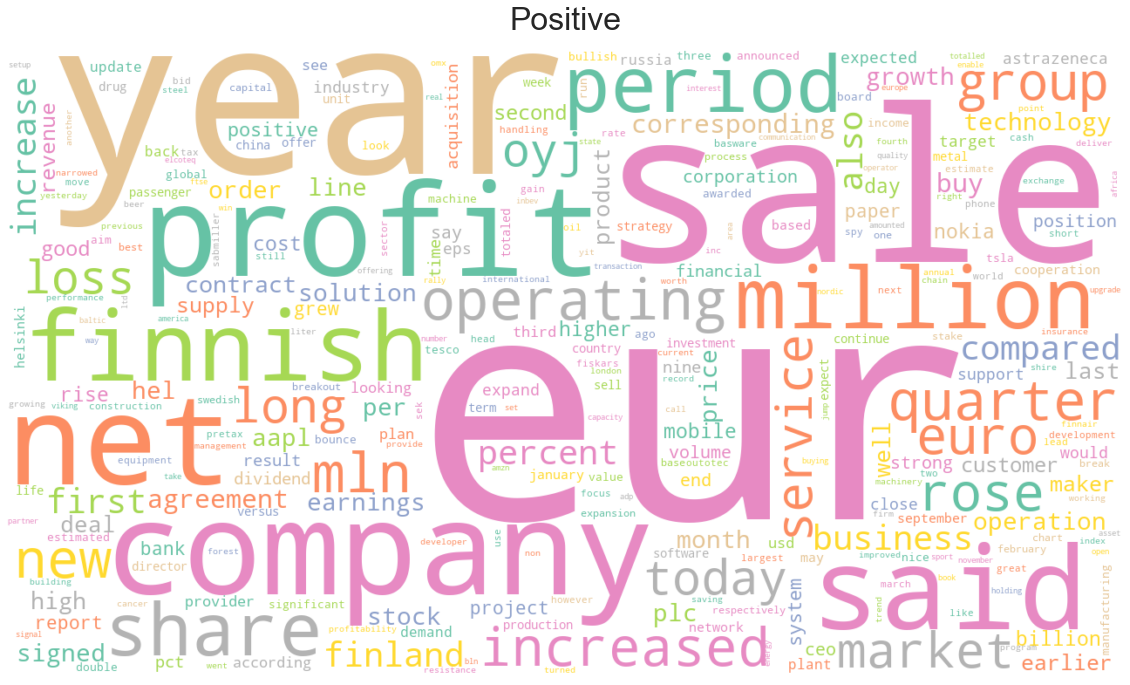

In [18]:
# wordcloud for positive statements
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
#     mask=mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['Sentiment'] == 'positive'].clean_sentence)))

plt.axis('off')
plt.title('Positive', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig("../images/wordcloud-positive.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()

## WordCloud: Negative sentences
----

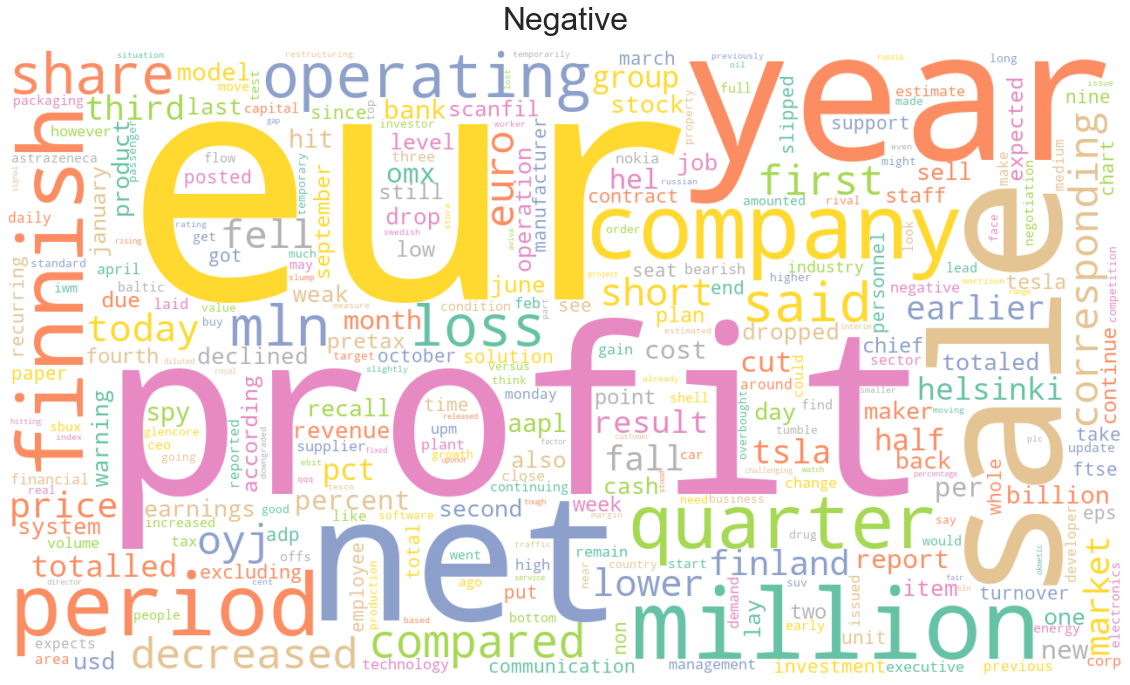

In [19]:
# wordcloud for negative statements
plt.figure(figsize=(20,20))

wordcloud = WordCloud(
    min_font_size=5, 
    max_words=300, 
    width=1280, 
    height=720, 
    stopwords=stop_words, 
    background_color='white',
    collocations=False,
    colormap=colormap,
#     mask=mask,
#     contour_color='#1DA1F2',
#     contour_width=1
).generate(str(" ".join(df_train[df_train['Sentiment'] == 'negative'].clean_sentence)))

plt.axis('off')
plt.title('Negative', fontsize=32, pad=20)
plt.imshow(wordcloud, interpolation='bilinear')
# plt.savefig("../images/wordcloud-negative.png", format="png", bbox_inches='tight', pad_inches=0)
plt.show()